In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
import retro
import scipy.misc
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import cv2 as cv

from EightBitTemplateMatcher import EightBitTemplateMatcher

env = None

In [30]:
all_sonic_dir = 'data/sonic2/sonic'
all_sonic_files = os.listdir( all_sonic_dir )
all_sonic_files.sort()
all_sonics = [ scipy.misc.imread( os.path.join( all_sonic_dir, sonic_file ), mode='RGBA' ) for sonic_file in all_sonic_files ]

all_sonic_matcher = EightBitTemplateMatcher( all_sonics )

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


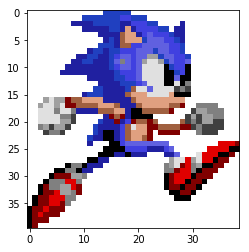

In [31]:
sonic_1_matcher = EightBitTemplateMatcher( [ scipy.misc.imread( './data/Sonic_2/Sonic/Common/18.png', mode='RGBA' ) ] )
sonic_2_matcher = EightBitTemplateMatcher( [ scipy.misc.imread( './data/Sonic_2/Badniks/Emerald_Hills/7.png', mode='RGBA' ) ] )

plt.imshow( scipy.misc.imread( './data/Sonic_2/Sonic/Common/18.png', mode='RGBA' ) )

In [32]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1')
_ = env.reset()

In [33]:
i=0
frame_src = None
while( i < 145 ):
    frame_src = env.step([ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ])[0]
    i+=1

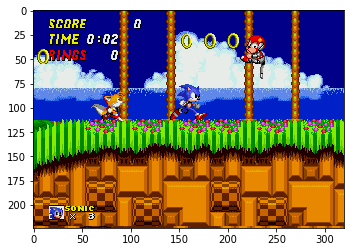

In [34]:
plt.imshow( frame_src )

In [42]:
match_1 = sonic_1_matcher.matchTemplate( frame_src )
match_2 = sonic_2_matcher.matchTemplate( frame_src )
all_match = all_sonic_matcher.matchTemplate( frame_src )

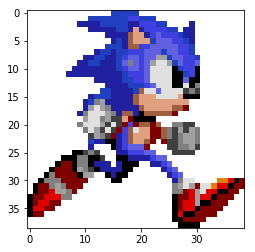

In [43]:
plt.imshow( all_sonics[ all_match[ -1 ] ] )

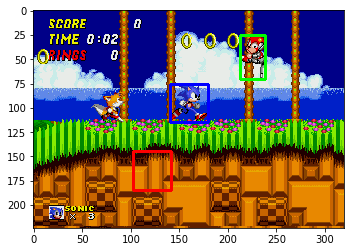

In [44]:
frame_copy = frame_src.copy()
cv.rectangle( frame_copy, match_1[ 1 ], match_1[ 2 ], ( 255, 0, 0 ), 2 )
cv.rectangle( frame_copy, match_2[ 1 ], match_2[ 2 ], ( 0, 255, 0 ), 2 )
cv.rectangle( frame_copy, all_match[ 1 ], all_match[ 2 ], ( 0, 0, 255 ), 2 )
plt.imshow( frame_copy )